In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def val(P,x):
    return P[0]+P[1]*x+P[2]*x*x
def grad(P,x):
    return P[1]+P[2]*2*x

N=50,A=0
mean=1726.4566845106208,median=1701.9814266811195
opt=1662.8954346209405 (arg=1.3701446729880356)


<IPython.core.display.Javascript object>


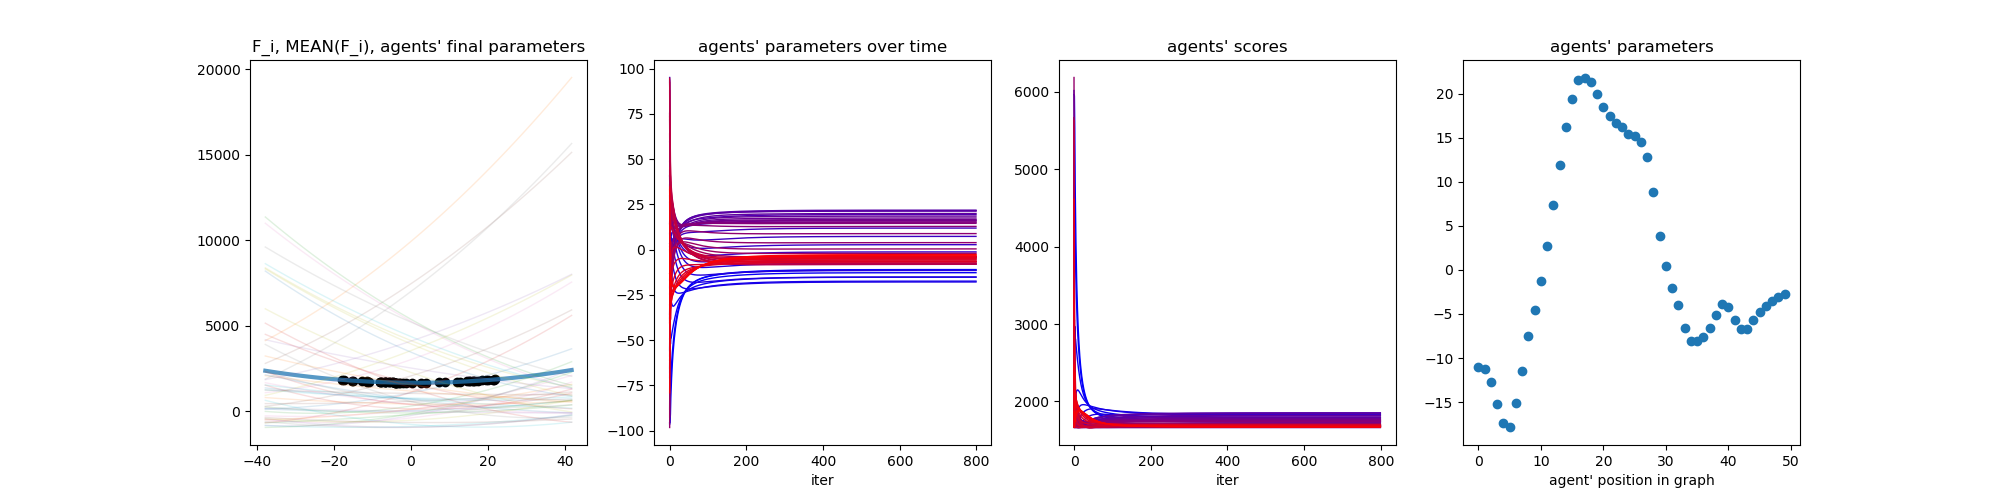

[-11.026628818023221, -11.295898323261833, -12.753125675572633, -15.228656460902618, -17.41691888178771, -17.874302931517168, -15.134399713029715, -11.525663295738767, -7.538165693820317, -4.55673577332938, -1.260480026554885, 2.7273157536509682, 7.305004928759398, 11.90553714710988, 16.237533808677473, 19.402163805059995, 21.513120460395204, 21.8075658741615, 21.286324848360383, 19.96586554476789, 18.51917160570524, 17.484926054815315, 16.65808298445467, 16.15157862100389, 15.369490869516511, 15.140785913124944, 14.499389336546669, 12.828080603382729, 8.855912032297399, 3.864924214808411, 0.39426858826666705, -2.0177232460210663, -3.9547164224378353, -6.6164882739093605, -8.110600540163766, -8.113501211228742, -7.673958970089068, -6.579130192609004, -5.1060716363642, -3.91756236008167, -4.188707945899588, -5.690096517878694, -6.755474632202277, -6.709490518208194, -5.739382773176952, -4.756925161664564, -4.059448968327202, -3.5160490690857844, -3.0503477368311636, -2.7699261092084164]

In [18]:
N,A=50,0
ITER=800
print('N='+str(N)+',A='+str(A))
T=0.01
rnd.seed(1)
#Ps=[[0,0,1],[1000000,-2000,1],[1000000,-2000,1],[0,0,1]]
Ps=[]
for i in range(N):
    a=rnd.uniform(0,1)
    v=rnd.uniform(-100,100)
    #a(x-v)^2=ax^2-2avx+av^2
    Ps.append([a*v*v+rnd.uniform(-1000,1000),-2*a*v,a])

breadth=1
graph=[[j for j in range(max(0,i-breadth),min(i+breadth+1,N))] for i in range(N)]
for a in range(A):
    graph.append([i for i in range(N)])
    for i in range(N):
        graph[i].append(len(graph)-1)

locsversions=[]
locs=[rnd.uniform(-100,100) for i in range(N)]
for a in range(A):
    locs.append(10000)
for rep in range(ITER):
    locsversions.append(locs.copy())
    nlocs=[locs[i]-T*grad(Ps[i],locs[i]) for i in range(N)]
    for a in range(A):
        nlocs.append(10000) #basic adversary: always send this big number to all neighbors
    for i in range(N):
        #TODO: use smarter use of neighbors' values?
        tmp=[nlocs[j] for j in graph[i]]
        tmp.sort()
        locs[i]=np.mean(tmp)#[1:-1])
locsversions.append(locs)

tP=[0 for i in range(3)]
for P in Ps:
    for i in range(3):
        tP[i]+=P[i]
for i in range(3):
    tP[i]/=N
scrs=[val(tP,locs[i]) for i in range(N)]
print('mean='+str(np.mean(scrs))+',median='+str(np.median(scrs)))
print('opt='+str(val(tP,-tP[1]/(2*tP[2])))+' (arg='+str(-tP[1]/(2*tP[2]))+')')

t1=np.linspace(min(locs[0:N])-20,max(locs[0:N])+20,50)
fig,ax=plt.subplots(1,4,figsize=(20,5))

ax[0].set_title('F_i, MEAN(F_i), agents\' final parameters')
ax[0].plot(t1,val(tP,t1),linewidth=3,alpha=0.75)
for P in Ps:
    ax[0].plot(t1,val(P,t1),linewidth=1,alpha=0.15)
ax[0].scatter(x=locs[0:N],y=[val(tP,locs[i]) for i in range(N)],c='black')

ax[1].set_title('agents\' parameters over time')
ax[1].set_xlabel('iter')
for i in range(N):
    ax[1].plot([locsversions[k][i] for k in range(ITER)],linewidth=1,color=(i/N,0,1-i/N))

ax[2].set_title('agents\' scores')
ax[2].set_xlabel('iter')
for i in range(N):
    ax[2].plot([val(tP,locsversions[k][i]) for k in range(ITER)],linewidth=1,color=(i/N,0,1-i/N))
plt.savefig('tmp.png')

ax[3].set_title('agents\' parameters')
ax[3].set_xlabel('agent\' position in graph')
ax[3].scatter(x=range(N),y=locs)
plt.savefig('tmp.png')
print(locs)